In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
path = r'/Users/macintosh/Documents/OneDrive - Cardiff University/04 - Projects/02 - Warwick/04 - Data/'
file = "compiled_data.csv"
saving_path = r'/Users/macintosh/Documents/OneDrive - Cardiff University/04 - Projects/02 - Warwick/01 - Analyses/'

In [3]:
df = pd.read_csv(path+file, index_col=0, parse_dates=True)

In [4]:
df["week"]= df.index.weekofyear
df.head()

,Electricity,Heat,HeatFlow,Temperature,Hour,DayOfWeek_name,DayOfWeek,Month,Weekday,HH,Holiday,Date,Season,week
2016-01-01 00:00:00,26.0,0.1,3.3,2.7300,0,Friday,4,1,1,0,1,2016-01-01,Winter,53
2016-01-01 00:30:00,27.0,0.2,3.2,2.6400,0,Friday,4,1,1,1,1,2016-01-01,Winter,53
2016-01-01 01:00:00,29.0,0.1,3.3,2.5500,1,Friday,4,1,1,2,1,2016-01-01,Winter,53
2016-01-01 01:30:00,29.0,0.1,3.2,1.5425,1,Friday,4,1,1,3,1,2016-01-01,Winter,53
2016-01-01 02:00:00,29.0,0.2,3.3,0.5350,2,Friday,4,1,1,4,1,2016-01-01,Winter,53


In [5]:
signal = df.loc[df["Month"]==5, "Electricity"].values

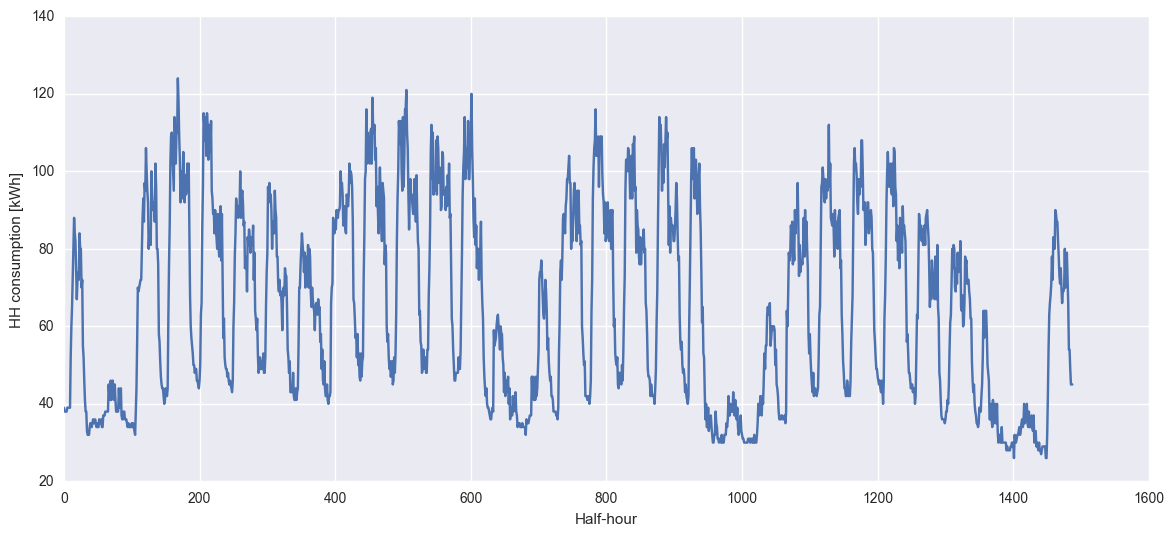

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))
plot = plt.plot(signal) #30min resolution

ax.set_xlabel("Half-hour")
ax.set_ylabel("HH consumption [kWh]")
plt.savefig(saving_path+"electricity-half-hourly-month.png")

In [7]:
fourrier = np.fft.rfft(signal)
fourrier = [abs(x) for x in fourrier] #only look at the real numbers
sample_spacing = 30*60 #Sample are every 1800sec
freq = np.fft.rfftfreq(len(signal), d=30*60)

In [8]:
mean_fourrier = np.mean(fourrier)
std= np.std(fourrier)

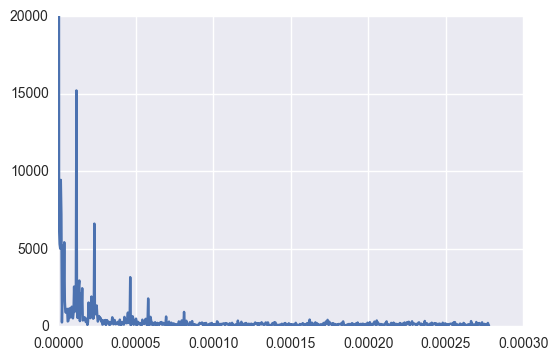

In [16]:
axes = plt.gca()
axes.set_ylim([0,20000])
#freq = freq[freq<=1/(30*60)]
#fourrier = fourrier[:len(freq)]
plot = plt.plot(freq, fourrier)
plt.savefig(saving_path+"fft.png")

In [10]:
print("mean", mean_fourrier)
for index, x in enumerate(fourrier):
    
    if x>mean_fourrier+std:
        print(index, freq[index],"frequency:", 1/freq[index]/(60), "min", 1/freq[index]/60/60, "hour", 1/freq[index]/60/60/24, "day", x)

mean 441.373095064
0 0.0 frequency: inf min inf hour inf day 97404.0
1 3.73357228196e-07 frequency: 44640.0 min 744.0 hour 31.0 day 6439.36800674
2 7.46714456392e-07 frequency: 22320.0 min 372.0 hour 15.5 day 5306.89539324
3 1.12007168459e-06 frequency: 14880.0 min 248.0 hour 10.3333333333 day 5008.24968731
4 1.49342891278e-06 frequency: 11160.0 min 186.0 hour 7.75 day 9444.16442915
5 1.86678614098e-06 frequency: 8928.0 min 148.8 hour 6.2 day 7226.45169657
8 2.98685782557e-06 frequency: 5580.0 min 93.0 hour 3.875 day 5197.89813741
10 3.73357228196e-06 frequency: 4464.0 min 74.4 hour 3.1 day 5421.59974956
31 1.15740740741e-05 frequency: 1440.0 min 24.0 hour 1.0 day 15213.5141316
62 2.31481481481e-05 frequency: 720.0 min 12.0 hour 0.5 day 6622.16790107
